# Improving Customer Satisfaction using Current Feedback

In this project we will be assessing current customer satisfaction feedback related to an anonymised airline, known in this dataset as Invistico.

We want to use the current feedback to determine which features:
1. Most impact customer satisfaction: allowing us to ensure a rollout of such features across the airline's fleet or, in the case of negative impact, improve these features.
2. Can lead to improved customer loyalty: we can use this information to target non-loyal customers and increase loyalty overall
3. Can predict future customer experience satisfaction: Finding the features that are most impactful on satisfaction will allow us to predict if a future flight, experience or type of customer, is more or less likely to be satisfied with their experience.

The data we are using is from Kaggle, uploaded to that website in 2020. It and can be found [here](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction?resource=download). It is real data from a real airline.

### Methodology

The steps we will follow in this project are:

- Cleaning
- Exploratory analysis and visualisations
- Feature prediction using machine learning


## Cleaning and exploration

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [2]:
#Our dataset
csv = 'Invistico_Airline.csv'

In [3]:
data = pd.read_csv(csv)
df = pd.DataFrame(data)

In [4]:
df.head(3)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0


#### Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

We have a selection of columns related to the services offered on an airline. We'll go through them below:

<br>**satisfaction**: either satisfied or dissatisfied, overall experience reported
<br>**gender**: customer's gender
<br>**customer type**: either 'loyal customer' or 'disloyal customer', i.e. are they a repeat customer or part of a loyalty scheme (not clear from dataset but either acceptable)
<br>**age**: age of customer
<br>**type of travel**: either 'personal' or 'business' travel
<br>**class**: 'Eco' (economy), 'Business', or 'Eco Plus'
<br>**flight distance**: distance of journey
<br><br>The following columns contain the customer's ratings across a variety of features. They are integers, ranking from 0-5
<br>**seat comfort**
<br>**departure/arrival time convenient**
<br>**food and drink**
<br>**gate location**
<br>**inflight wifi service**
<br>**inflight entertainment**
<br>**online support**
<br>**ease of booking online**
<br>**on-board service**
<br>**leg room service**
<br>**baggage handling**
<br>**checkin service**
<br>**cleanliness**
<br>**online boarding**
<br><br>The final two columns give the delay, if any, in minutes for either departure or arrival.
<br>**departure delay in minutes**
<br>**arrival delay in minutes**

Below we will:
- change the column names to be more uniform and easier to work with
- ensure the columns are the correct type
- check for any nulls, outliers or other relevant figures in the data

In [6]:
#Fixing up column headings
new_cols = []

for item in df.columns:
    item = item.lower()
    item = item.replace(' ','_')
    item = item.replace('/','_')
    new_cols.append(item)
    
df.columns=new_cols
df.columns

Index(['satisfaction', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'seat_comfort',
       'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')

In [7]:
#The last column, arrival_delay_in_minutes is a float while it's counterpart for departure is an int. Which is better?
#Do any of the float-type rows use the decimal?

dec_filter = df['arrival_delay_in_minutes'] %1==0 
df[~dec_filter]['arrival_delay_in_minutes'].unique() #filtering any with non-0 as the decimal point

array([nan])

So the arrival_delay_in_minutes column has some NaN values, but otherwise is all around numbers.

We'll change these NaN values to 0 and convert to float. I'm also going to add a column that denotes if there was a delay of over 15 minutes.

In [8]:
df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].fillna(0).astype(int)

In [9]:
delays = df['departure_delay_in_minutes'] > 15
df['was_delayed'] = delays == True

In [10]:
df

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,was_delayed
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,3,0,3,5,3,2,0,0,False
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,3,4,4,4,2,3,2,310,305,True
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,3,3,4,4,4,2,0,0,False
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,1,0,1,4,1,3,0,0,False
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,2,0,2,4,2,5,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,3,3,4,4,4,2,0,0,False
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,3,2,3,3,1,2,1,174,172,True
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,4,4,3,4,2,3,2,155,163,True
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,3,3,2,3,2,1,2,193,205,True


We can see from when we called df.info() earlier that this is the only column with nulls, so happy to move on. We'll check for outliers/wrong data next.

In [11]:
#Some organising for filter use

rating_cols = ['seat_comfort',
       'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding']

numeric_cols = ['flight_distance', 'seat_comfort',
       'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes']

cat_cols = ['satisfaction', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class']

In [12]:
#First to confirm nulls and also the unique vals of each column

def data_checker(dataframe):
    checklist = []
    columns = dataframe.columns
    for item in columns:
        nulls = dataframe[item].isnull().sum()
        uniques = dataframe[item].nunique()
        checklist.append([item,nulls,uniques])
    checker_df = pd.DataFrame(checklist)
    checker_df.columns = ['column', 'total_nulls', 'total_unique_values']
    return checker_df

data_checker(df)

,column,total_nulls,total_unique_values
0,satisfaction,0,2
1,gender,0,2
2,customer_type,0,2
3,age,0,75
4,type_of_travel,0,2
5,class,0,3
6,flight_distance,0,5398
7,seat_comfort,0,6
8,departure_arrival_time_convenient,0,6
9,food_and_drink,0,6


In [13]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
flight_distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
seat_comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
departure_arrival_time_convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
food_and_drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
gate_location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
inflight_wifi_service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
inflight_entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
online_support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
ease_of_online_booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0
on-board_service,129880.0,3.465075,1.270836,0.0,3.0,4.0,4.0,5.0


Lets focus on the rating columns first, i.e. all above rows except for flight distance and the delay_in_minutes rows.

We can see that all rating columns have a minimum of 0 except for baggage_handling, where the ratings start at 1. The mean varies around the high 2's to high 3's.

For the non-rating columns we can see that:
- Minimum flight distance is 50 and the maximum is 6951. It's not clear from the dataset which unit this is in, so I'm going to assume miles as a 50km flight seems quite short for a major airline. Equally, 6951 miles is a very decent long haul flight, e.g. it is just a bit longer than flying from New York to Tokyo).

- The mean delay in flight arrival or departure is around 15mins, but the standard deviation is showing this is quite variable, and the maximum delay for both departures and arrivals is over a day.

- Arrivals and departures delays are likely correlated - if there is a delay getting into the air, largely the plane could be expected be late arriving at it's destination too. We can check that with a correlation matrix.

/var/folders/jb/5csh6qnx4y7brg28_7d39qyw0000gq/T/ipykernel_34620/3125588650.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols_corr = df.corr()


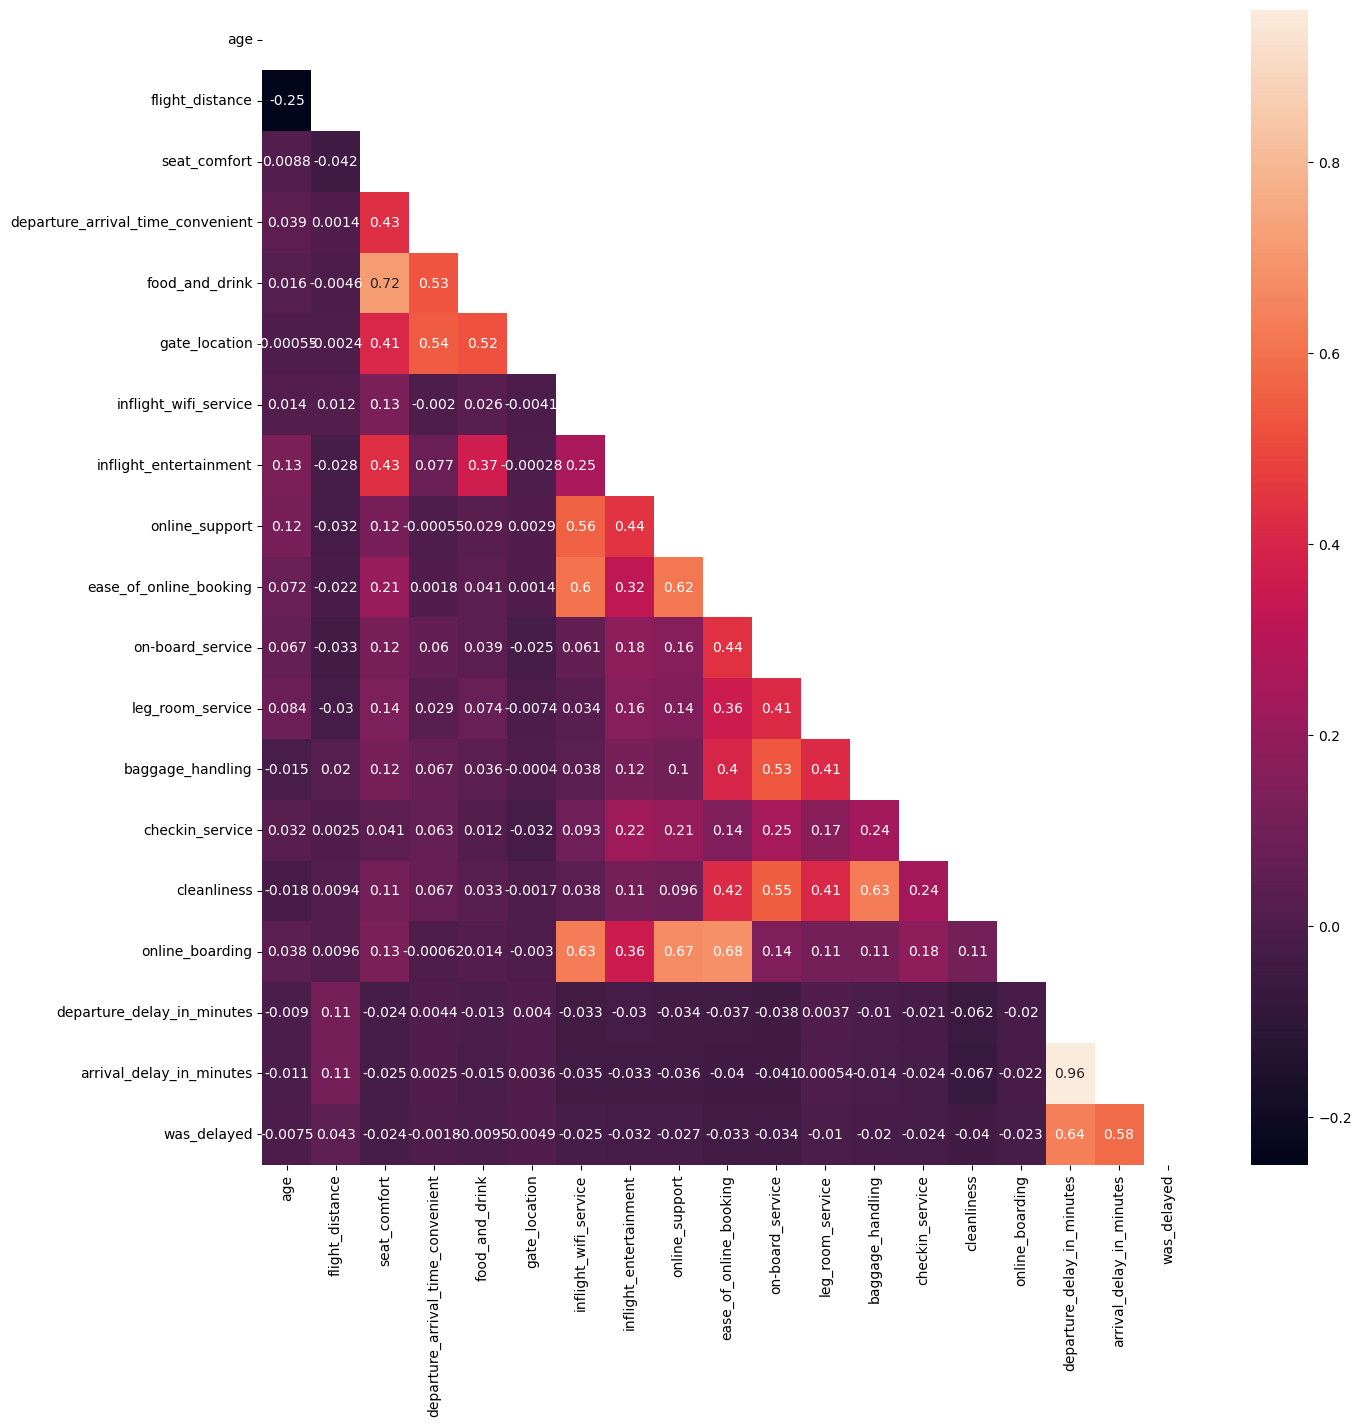

In [14]:
cols_corr = df.corr()
matrix = np.triu(cols_corr)

plt.figure(figsize=(15,15))
sns.heatmap(cols_corr, annot=True, mask=matrix)
plt.show()

As suspected, there is a very strong positive correlation between departure delays and arrival delays. For later work we will likely only need one of these columns.

There also looks to be good correlations between (amongst other things):
- Food and drink and flight distance (0.72)
- Online support and online boarding (0.68)
- Online support and ease of online booking (0.67)
- Baggage handling and cleanliness (0.63)
- On-board service and cleanliness (0.55)

We'll explore these in more detail now as we move into the exploratory visualisation phase of this project.

### Exploration

Let's now use some data visualisation techniques to understand the distribution of satisfied/unsatisfied customers better.

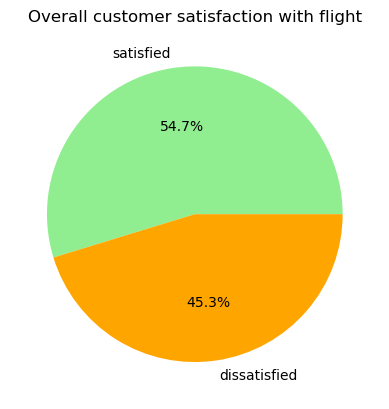

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64


In [15]:
palette = ['lightgreen', 'orange']

#Distribution of satisfied vs dissatisfied customers
plt.pie(df['satisfaction'].value_counts(), labels=['satisfied','dissatisfied'],
       autopct='%1.1f%%', colors=palette)
plt.title('Overall customer satisfaction with flight')
plt.show()

print(df['satisfaction'].value_counts())

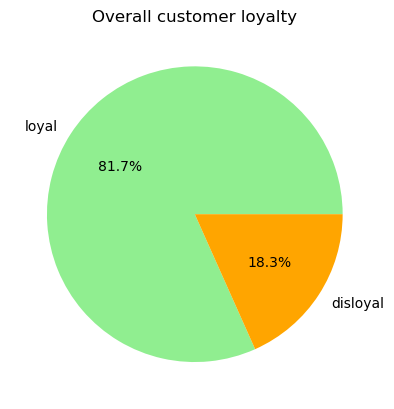

Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64


In [16]:
plt.pie(df['customer_type'].value_counts(), labels=['loyal','disloyal'],
       autopct='%1.1f%%', colors=palette)
plt.title('Overall customer loyalty')
plt.show()

print(df['customer_type'].value_counts())

Most of the customers giving feedback are loyal. The method of sampling this dataset is not given, so it might be that loyal customers are more easily convinced, motivated or contactable to give feedback. 

It might also be the case that this is a random and well-sampled dataset, which we will have to assume is the case, and the above distribution represents the actual distribution of customers flying with our airline.

Overall, customers mostly satisfied but not by much. There is a huge proportion of the customer base who were not satisfied with their exerience. We'll see below if there are any patterns to these groups.

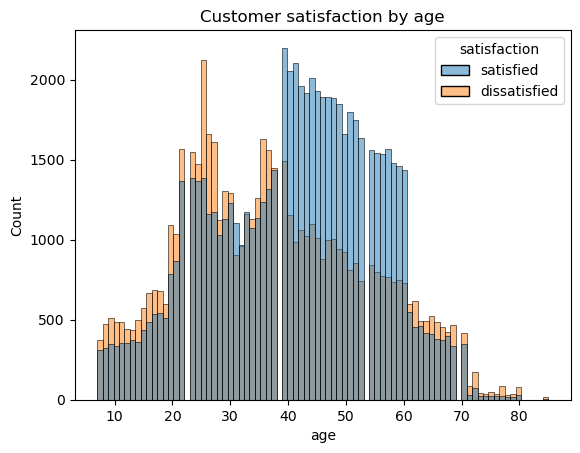

In [17]:
ax1 = sns.histplot(data=df, x=df['age'], hue=df['satisfaction'], color=palette)
plt.title('Customer satisfaction by age')
plt.show()

There is a fairly normal distribution of ages across our airline's customers. It seems that older customers are more likely to be satisfied with their experience, while younger ones skew more toward dissatisfaction.

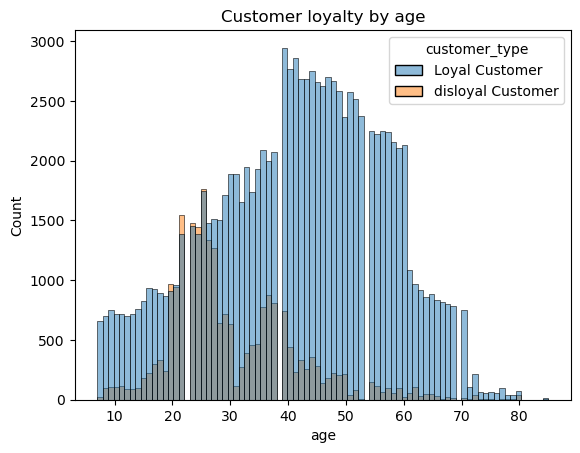

In [18]:
ax2 = sns.histplot(data=df, x=df['age'], hue=df['customer_type'], color=palette)
plt.title('Customer loyalty by age')

plt.show()

Disloyal customers are more likely to be younger, while repeat/loyal customers come from a range of ages.

We'll combine the two plots above for a bit more of a picture.

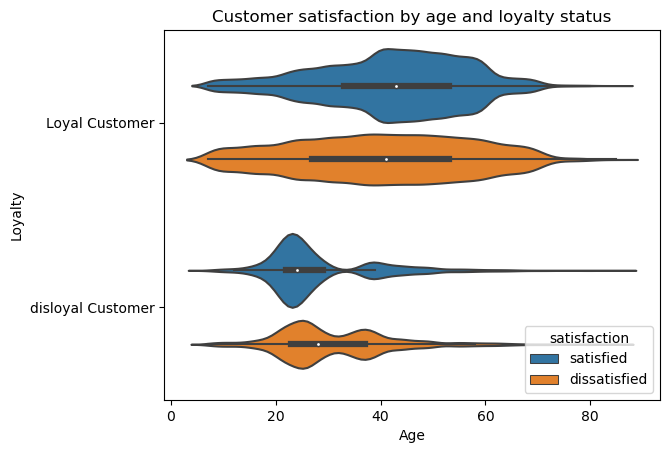

In [19]:
sns.violinplot(data=df, x=df['age'], y=df['customer_type'], hue=df['satisfaction'])
plt.ylabel('Loyalty')
plt.xlabel('Age')
plt.title('Customer satisfaction by age and loyalty status')
plt.show()

Walking through the above chart from top to bottom:
- Loyal customers are spread well across the age ranges. Satisfaction amongst loyal customers is slightly higher for the older ages, however there is a fairly equal balance of loyal customers who were dissatisfied.

- For our non-repeat customers, we know that overall this group is young so it is not too surprising to see that the bulk of both satisfied and dissatisfied disloyal customers are at the younger end of the chart. All the same, disloyal customer dissatisfaction looks to occur more broadly across the ages.

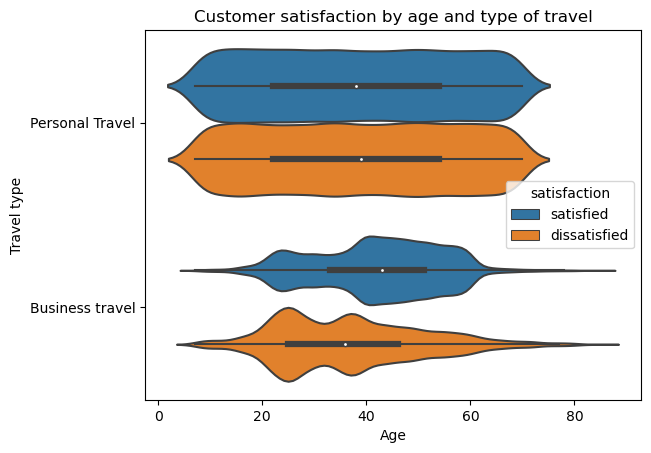

In [20]:
sns.violinplot(data=df, x=df['age'], y=df['type_of_travel'], hue=df['satisfaction'])
plt.ylabel('Travel type')
plt.xlabel('Age')
plt.title('Customer satisfaction by age and type of travel')
plt.show()

There is an interesting split when we look at satisfaction by age and travel type. Personal travelers are largely diverse and their satisfaction levels spread across the entire age range. Conversely, we see that business travlers are by and large betweeen the ages of 20 and 60 (to be expected, working ages), however our more mature business travelers are more satisfied with their experiences than younger ones.

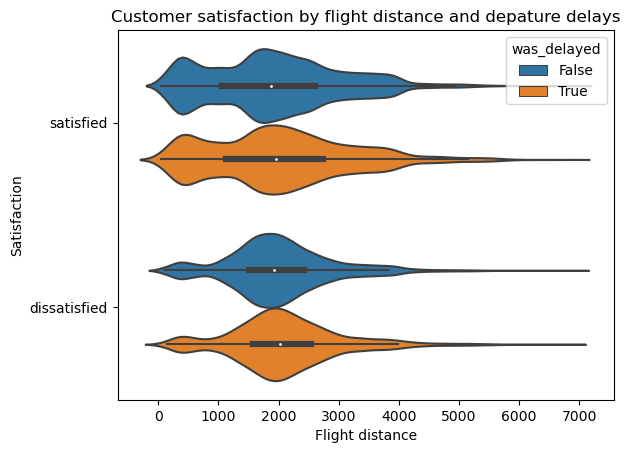

In [21]:
sns.violinplot(data=df, x='flight_distance', y='satisfaction', hue='was_delayed')
plt.ylabel('Satisfaction')
plt.xlabel('Flight distance')
plt.title('Customer satisfaction by flight distance and depature delays')
plt.show()

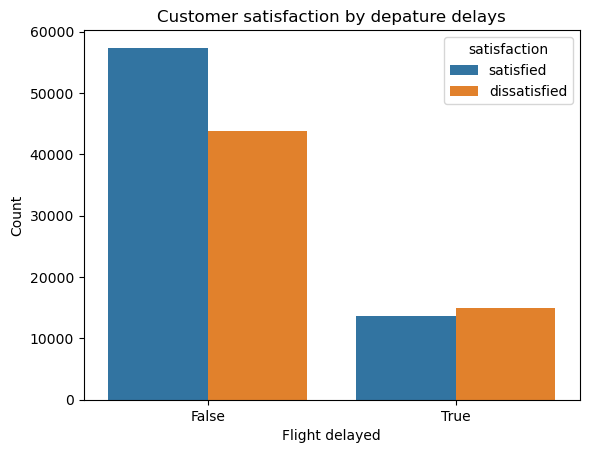

In [22]:
sns.countplot(data=df, x='was_delayed', hue='satisfaction')
plt.ylabel('Count')
plt.xlabel('Flight delayed')
plt.title('Customer satisfaction by depature delays')
plt.show()

In [24]:
df['departure_delay_in_minutes'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: departure_delay_in_minutes, dtype: float64

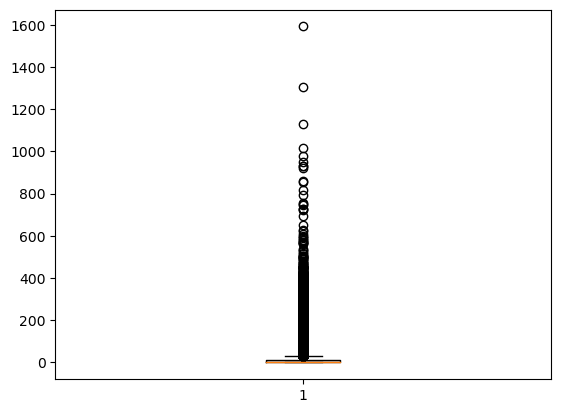

In [25]:
plt.boxplot(df['departure_delay_in_minutes'])
plt.show()

Flight departure delays do not seem to have largely impacted satisfaction. It looks like the majority of delays are short, with the mean at 14 mins, so it is likely that these small delays are not too troublesome for customers.

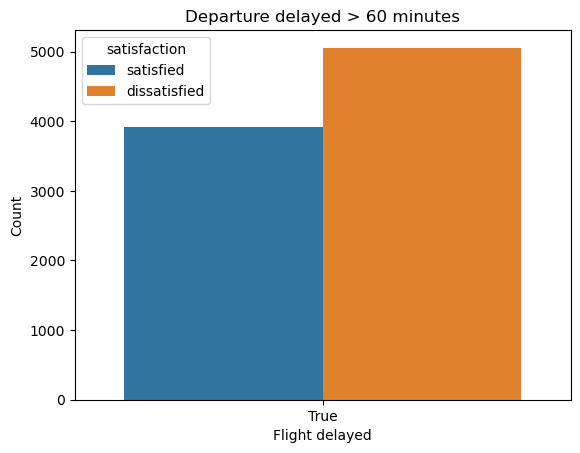

In [26]:
longer_delays = df[df['departure_delay_in_minutes'] > 60]

sns.countplot(data=longer_delays, x='was_delayed', hue='satisfaction')
plt.ylabel('Count')
plt.xlabel('Flight delayed')
plt.title('Departure delayed > 60 minutes')
plt.show()

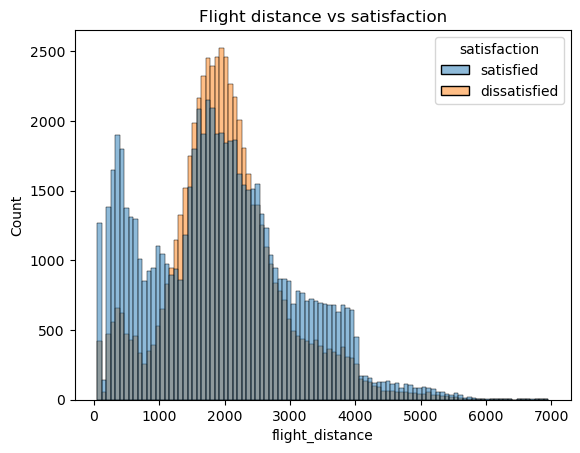

In [27]:
sns.histplot(data=df, x=df['flight_distance'], hue=df['satisfaction'], bins=100)
plt.title('Flight distance vs satisfaction')
plt.show()

### Which features have the best and worst customer satisfaction?

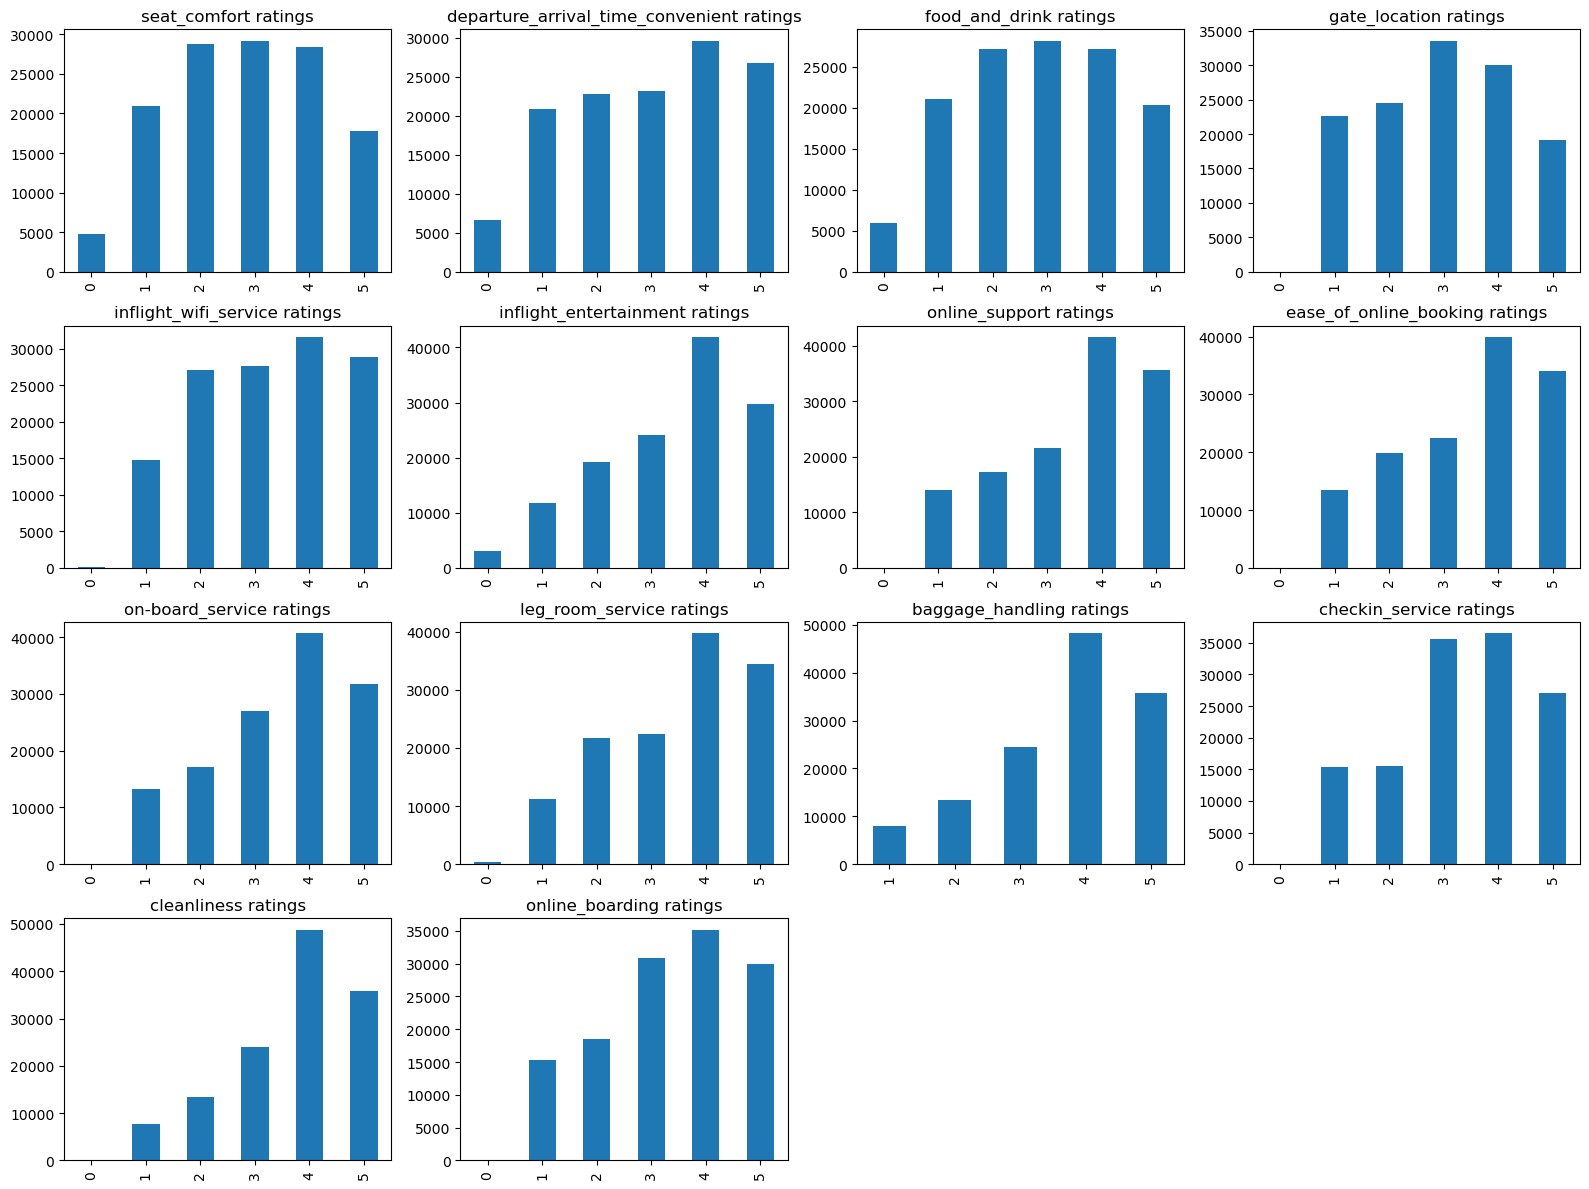

In [28]:
fig = plt.figure(2,figsize=(16,12))


for i, col in enumerate(rating_cols,1):
    fig.add_subplot(4,4,i)
    df[col].value_counts().sort_index().plot(kind='bar',ax=plt.gca())
    plt.title(col + ' ratings')
plt.tight_layout()
plt.show(1)

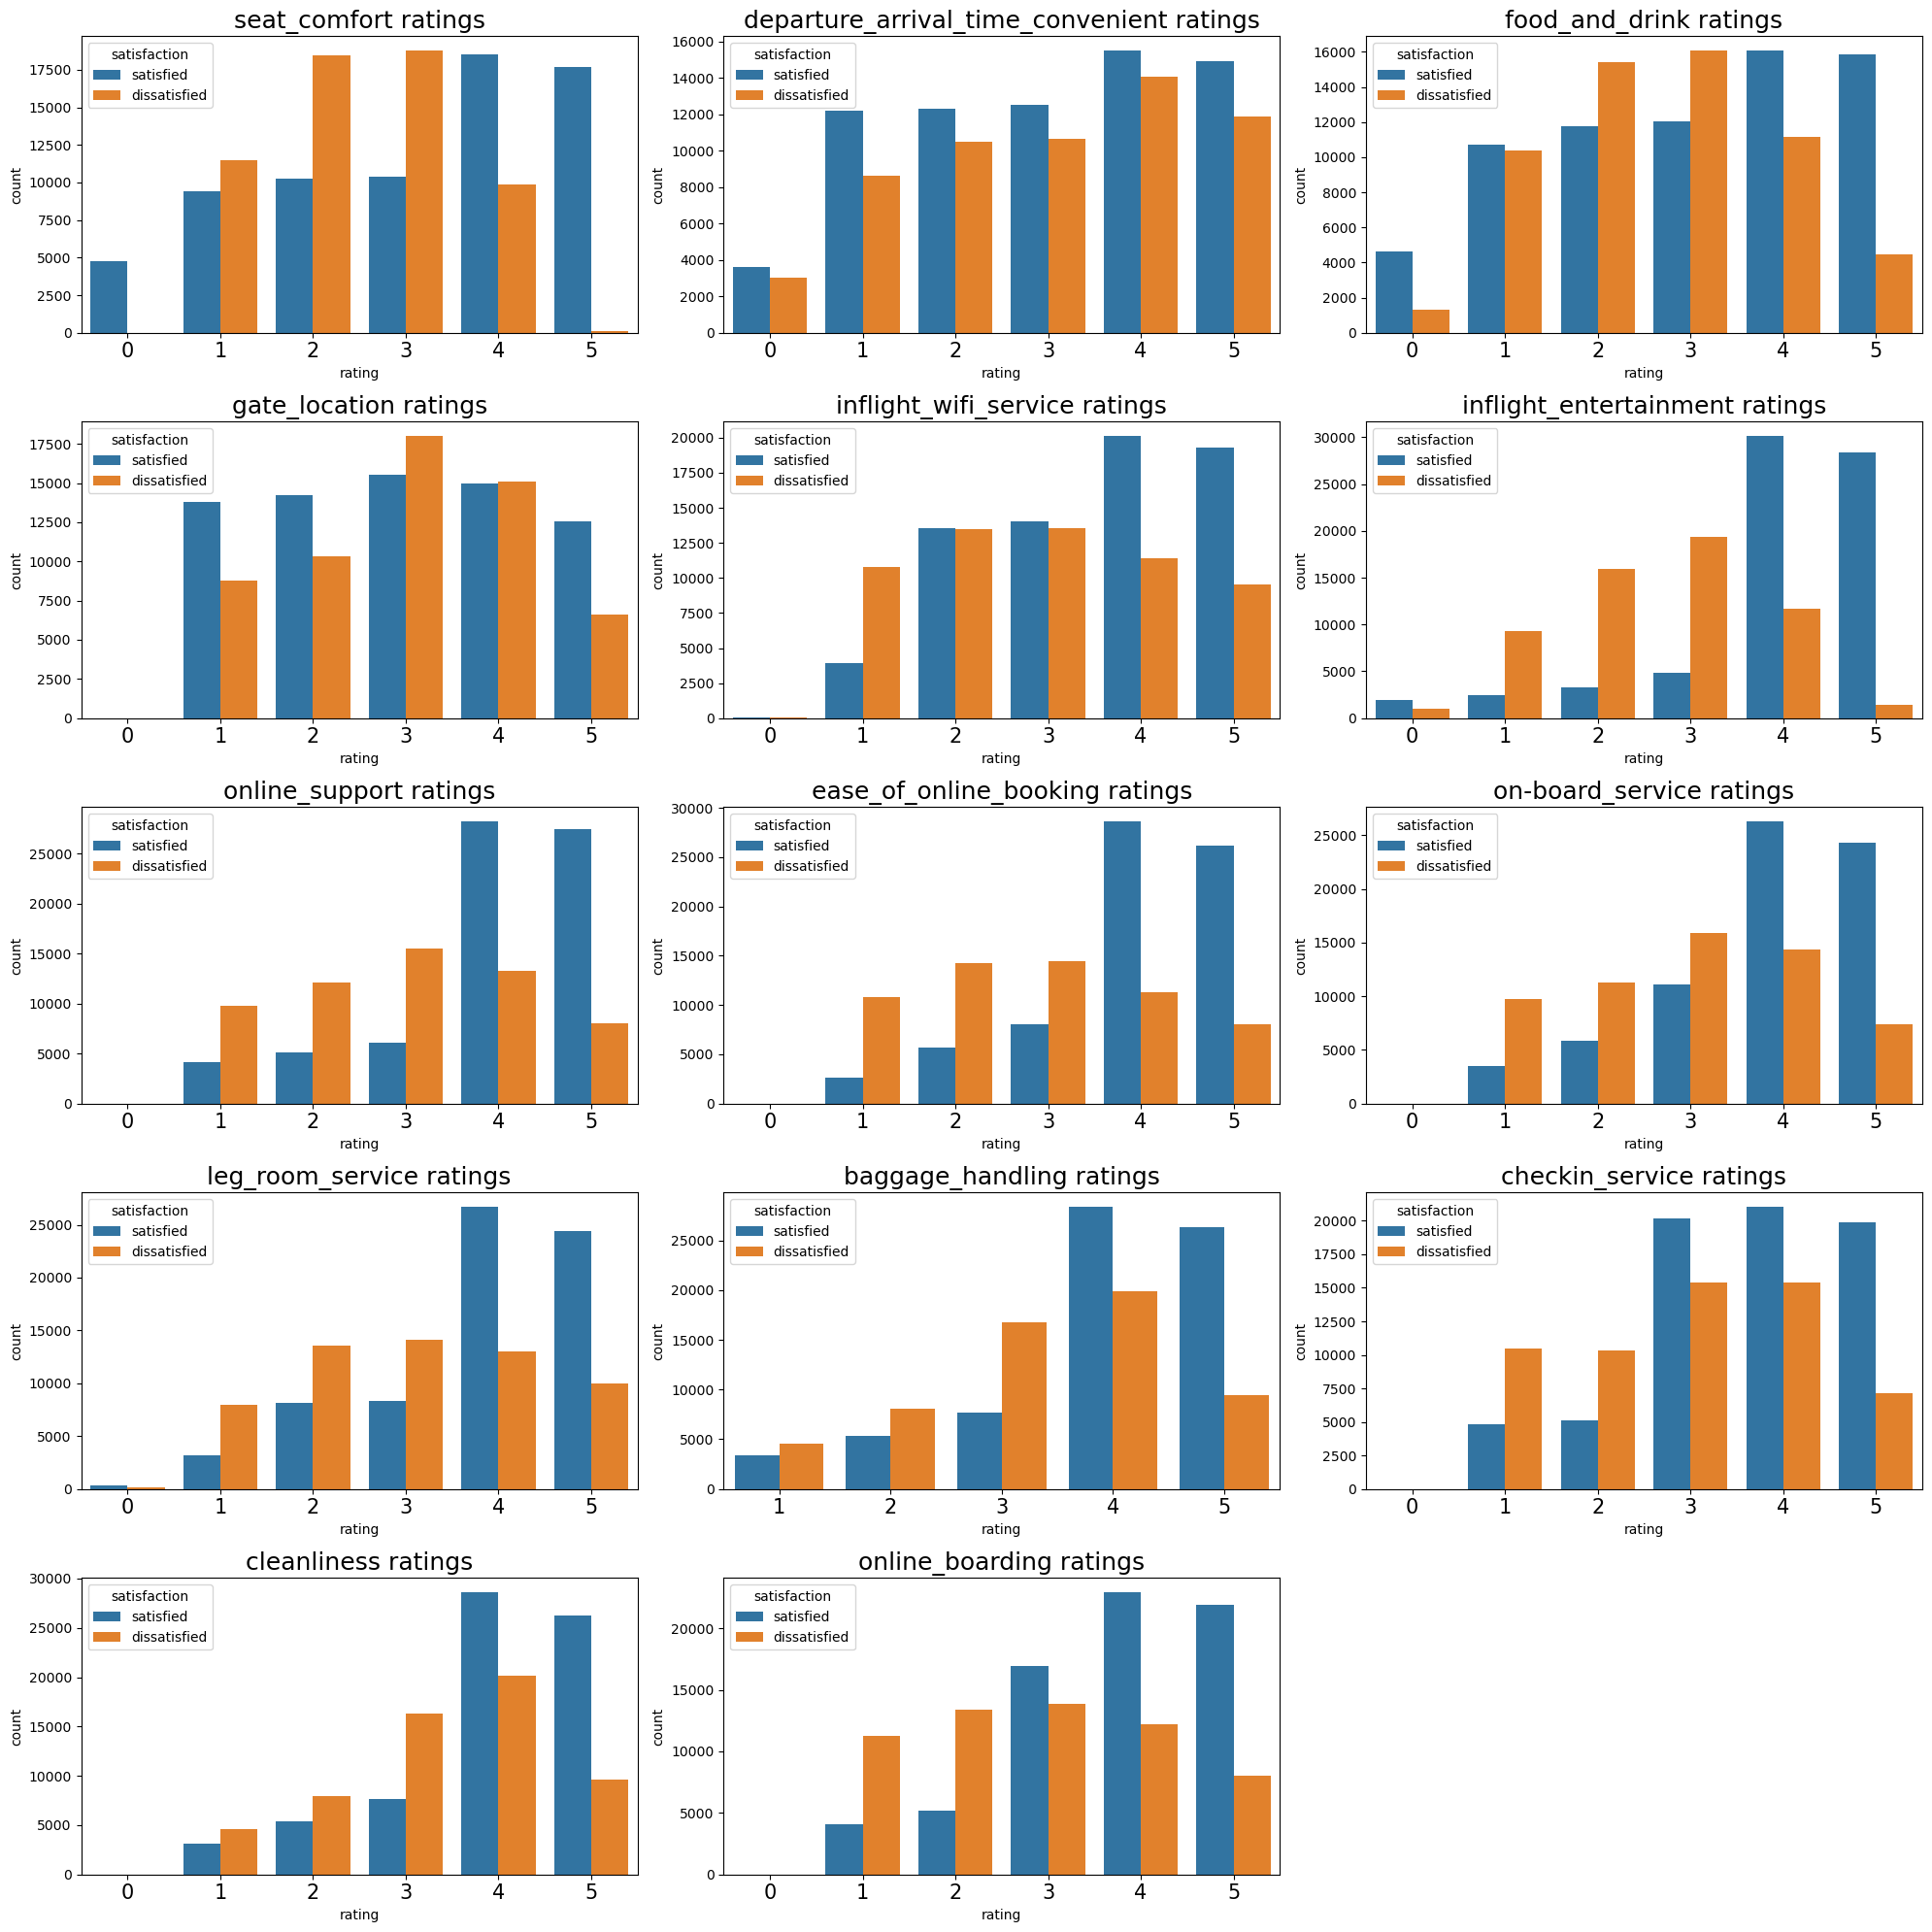

In [29]:
fig = plt.figure(2,figsize=(20,20))

for i, col in enumerate(rating_cols,1):
    fig.add_subplot(5,3,i)
    sns.countplot(data=df, x=df[col], hue='satisfaction')
    plt.title(col + ' ratings', size=18)
    plt.xlabel('rating')
    plt.xticks(size=15)
plt.tight_layout()
plt.savefig('satisfaction_and_ratings.jpg')
plt.show(1)

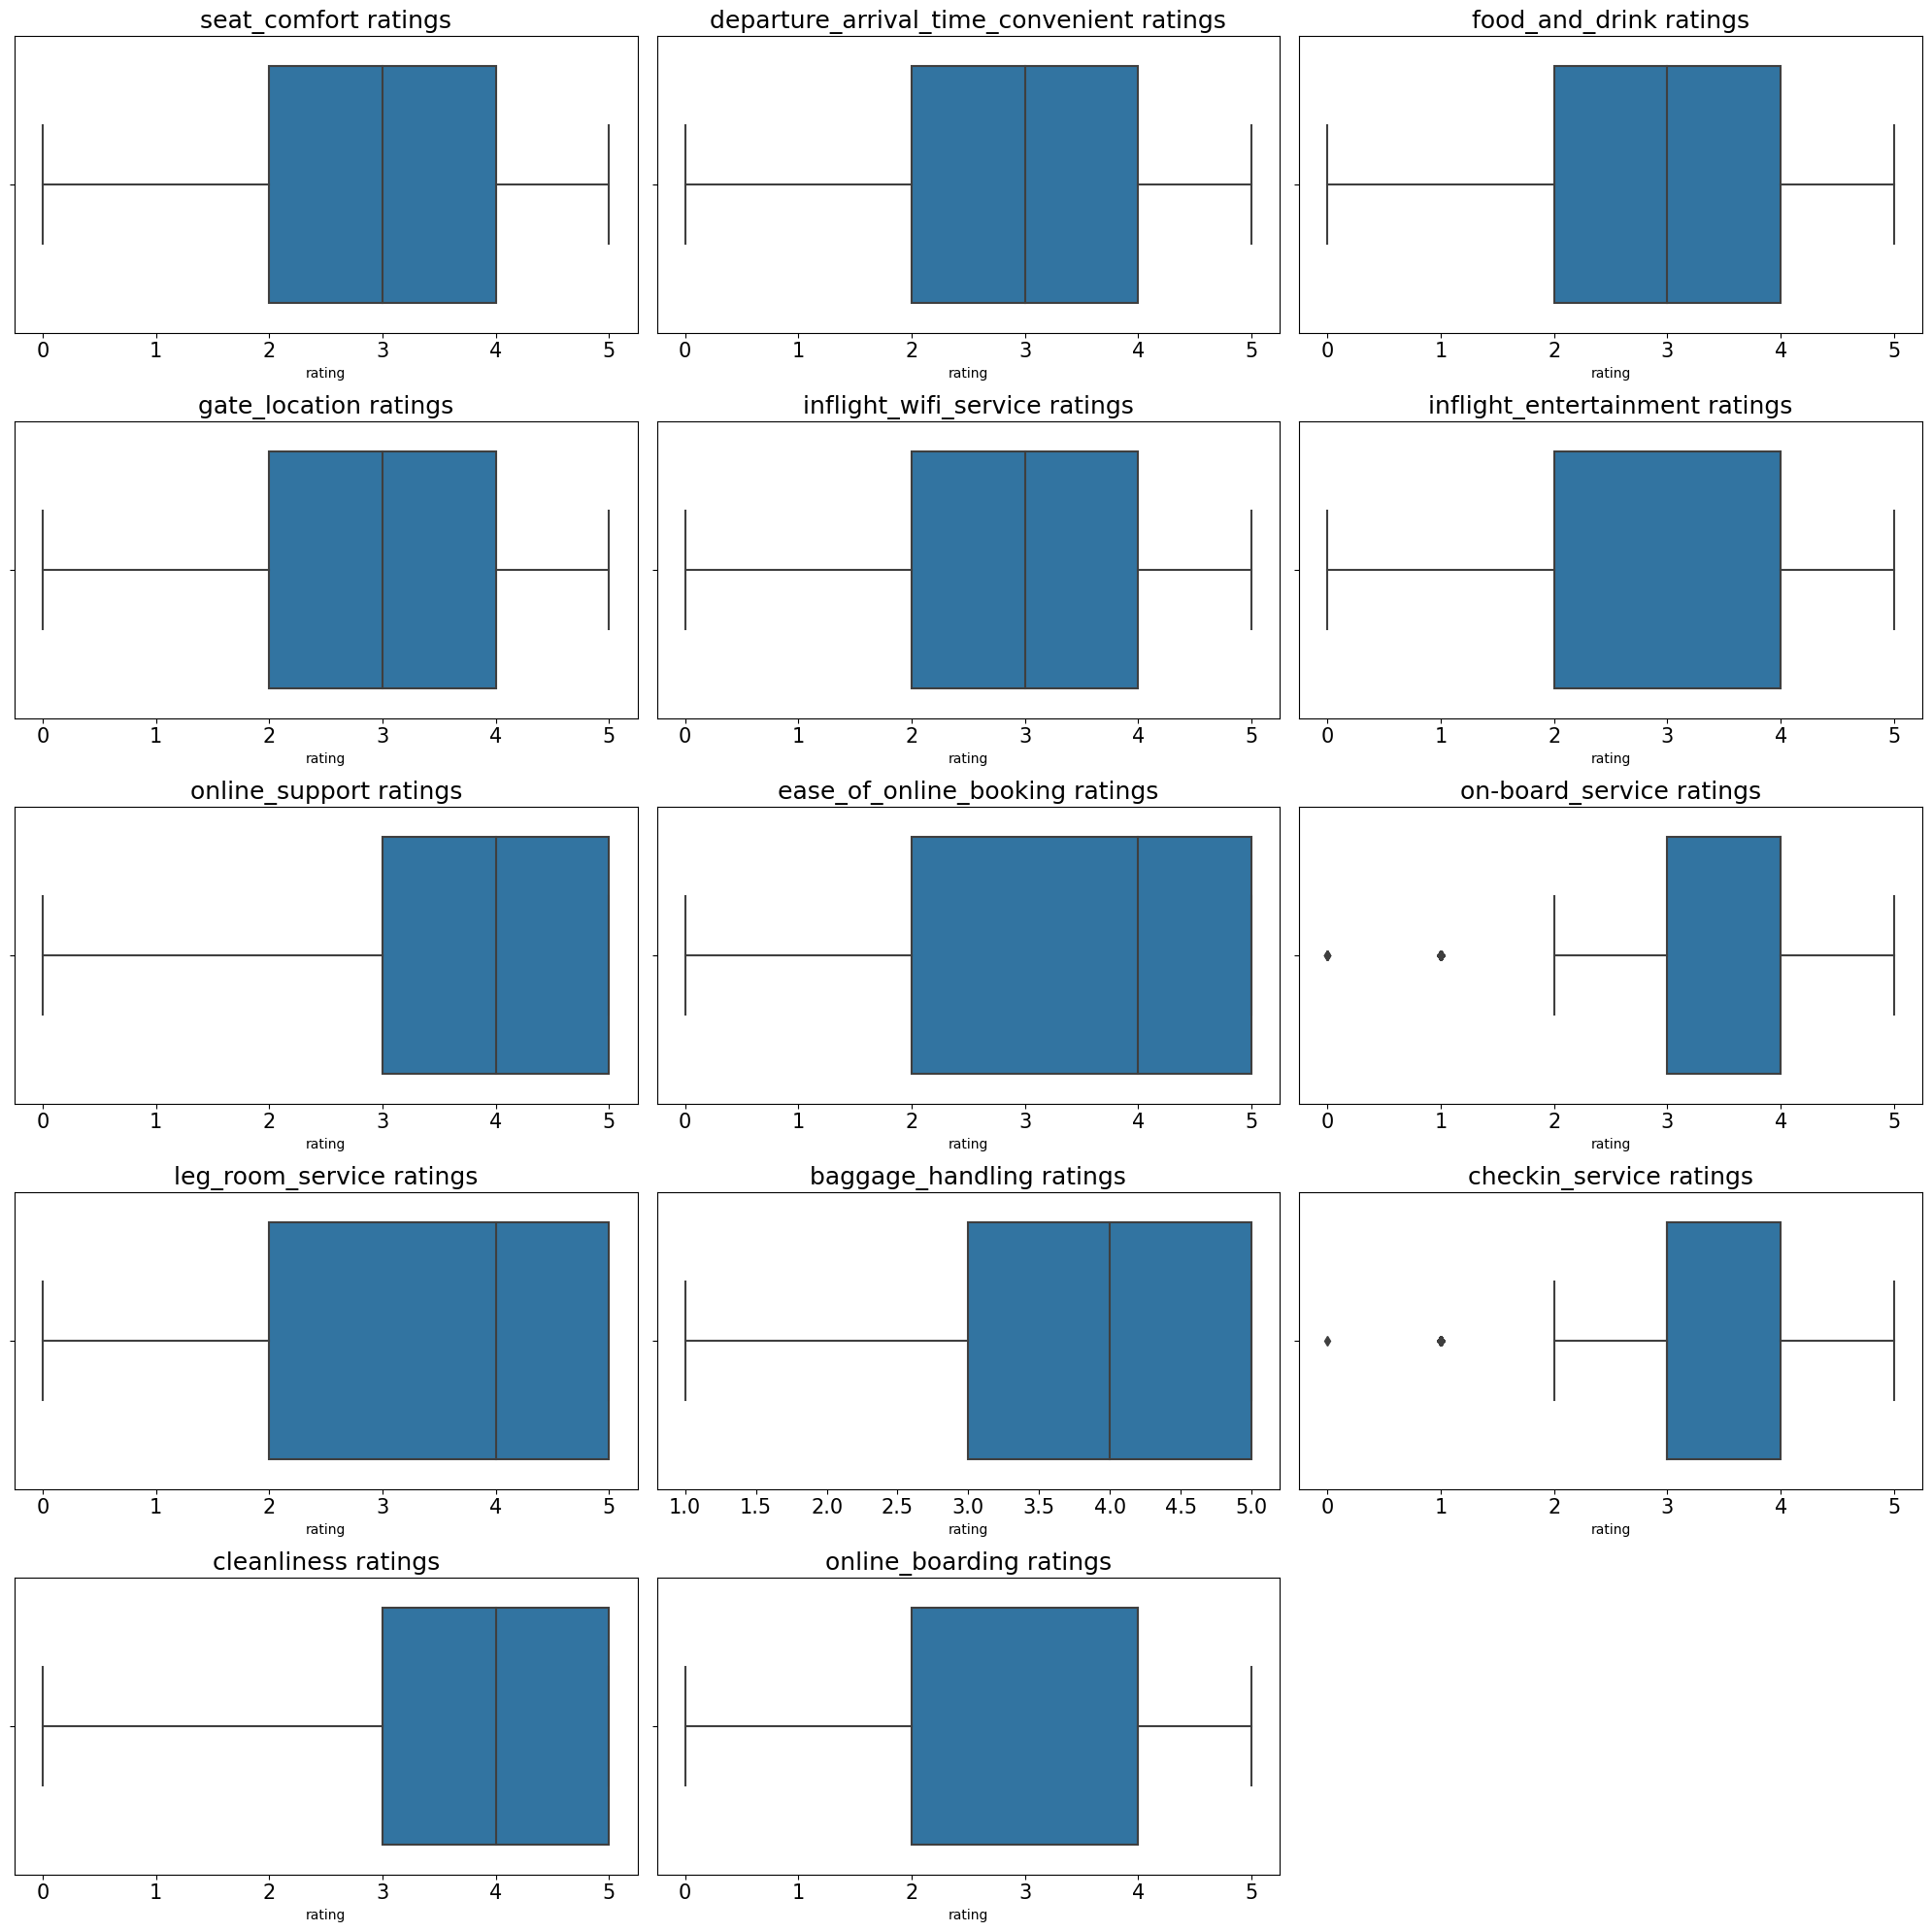

In [30]:
fig = plt.figure(2,figsize=(20,20))

for i, col in enumerate(rating_cols,1):
    fig.add_subplot(5,3,i)
    sns.boxplot(data=df, x=df[col])
    plt.title(col + ' ratings', size=18)
    plt.xlabel('rating')
    plt.xticks(size=15)
plt.tight_layout()
plt.savefig('satisfaction_and_ratings.jpg')
plt.show(1)

In [31]:
highly_rated_services = df[df.iloc[:,7:-2] >= 4]
highly_rated_services.iloc[:,7:-2].fillna(0).sum().sort_values(ascending=False).nlargest(5)

departure_delay_in_minutes    1894020.0
cleanliness                    374760.0
baggage_handling               371700.0
online_support                 343855.0
leg_room_service               330717.0
dtype: float64

In [32]:
highly_rated_services = df[df.iloc[:,7:-2] <= 2]
highly_rated_services.iloc[:,7:-2].fillna(0).sum().sort_values(ascending=False).nlargest(5)

seat_comfort                         78401.0
food_and_drink                       75368.0
gate_location                        71601.0
inflight_wifi_service                68801.0
departure_arrival_time_convenient    66416.0
dtype: float64

Above, we have plotted the count of each rating given by customers for each of the relevant flight features. These counts are divided by satisfied and dissatisfied custoemrs. 

Let's take a closer look at the charts.

Areas where there is little substantial difference between the two groups of customers:
- convenience of the departure and arrival times
- gate location

Areas where satisfied customers are very happy, dissatisfied customers are mixed or unhappy:
- cleanliness
- baggage handling
- leg room
- online support
- seat comfort
- food and drink
- in flight entertainment
- lots


## Which features can most impact satisfaction?

We'll now use machine learning to better understand which features most impact customer satisfaction.

As this is a classification problem, we'll see how successfully the data can be predicted using the following supervised machine learning tools:

- k-nearest neighbours
- logistic regression
- random forest

### Preprocessing
- Droppping unnecessary columns
- Processing columns as needed, some encoding required

In [33]:
#dropping unncessary columns
df = df.drop(columns=['arrival_delay_in_minutes'])

In [34]:
df.head(3)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,...,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,was_delayed
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,False
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,True
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,False


In [35]:
df_processed = df.copy(deep=True)

In [36]:
#Separating columns by data type
binary_cols = df_processed[['satisfaction', 'gender', 'type_of_travel', 'was_delayed', 'customer_type']]
category_cols = df_processed[['class']]
numeric_cols = df_processed[['age','flight_distance','departure_delay_in_minutes']]
ordinal_cols = df_processed.iloc[:,7:-2]

In [37]:
#Encoding necessary columns
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

lb, le = LabelBinarizer(), LabelEncoder()

In [38]:
#ordinals - may not be needed as most are already 1-5
#but one column was 0-5 so doing it to be sure all columns match up
for column in ordinal_cols:
    df_processed[column] = le.fit_transform(df[column])

In [39]:
#binaries
for column in binary_cols:
    df_processed[column] = lb.fit_transform(df[column])

In [40]:
#one-hot encoding the class category column
ohot = pd.get_dummies(df_processed['class'])
df_processed = df_processed.drop(columns=['class'])
df_processed = df_processed.join(ohot)

In [41]:
#scaling numeric values
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

df_processed[['age']] = mm.fit_transform(df_processed[['age']])
df_processed[['flight_distance']] = mm.fit_transform(df_processed[['flight_distance']])
df_processed[['departure_delay_in_minutes']] = mm.fit_transform(df_processed[['departure_delay_in_minutes']])

In [42]:
df_processed.head(4)

,satisfaction,gender,customer_type,age,type_of_travel,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,...,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,was_delayed,Business,Eco,Eco Plus
0,1,0,0,0.743590,1,0.031155,0,0,0,2,...,0,2,5,3,2,0.000000,0,0,1,0
1,1,1,0,0.512821,1,0.349804,0,0,0,3,...,4,3,2,3,2,0.194724,1,1,0,0
2,1,0,0,0.102564,1,0.302565,0,0,0,3,...,3,3,4,4,2,0.000000,0,0,1,0
3,1,0,0,0.679487,1,0.083031,0,0,0,3,...,0,0,4,1,3,0.000000,0,0,1,0


I actually don't need all the values that I scaled, but it's handy to have it done in case we want to play with them later. For the time being, w're going to be looking at which of the features in the rating columns were most impactful on customer satisfaction. So, we'll just use those columns for our KNN study.

1 = satisfied
0 = dissatisfied

In [43]:
df_ratings = df_processed.drop(columns=['gender', 'customer_type','age','type_of_travel','flight_distance',
                              'departure_delay_in_minutes','was_delayed','Business',
                              'Eco','Eco Plus'])

In [44]:
df_ratings.head(1)

,satisfaction,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding
0,1,0,0,0,2,2,4,2,3,3,0,2,5,3,2


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

# Set up X and y variables
y, X = df_ratings['satisfaction'], df_ratings.drop(columns='satisfaction')

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [46]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     17700
           1       0.93      0.92      0.92     21264

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964

Accuracy score:  0.92
F1 Score:  0.92


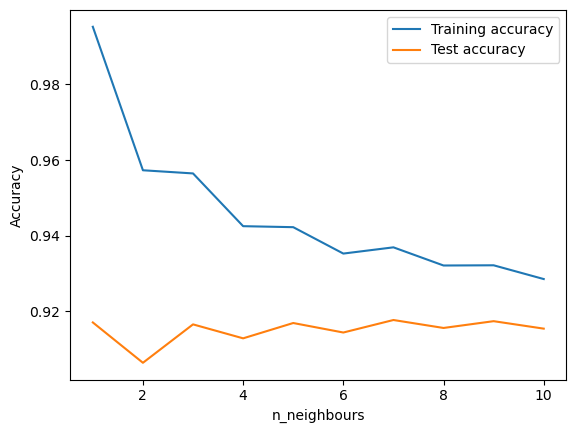

In [47]:
training_accuracy = []
test_accuracy = []

#try n neighbours from 1 to 10
neighbours_settings = range(1,11)

for n_neighbours in neighbours_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbours)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbours_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbours_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbours')
plt.legend()

In [48]:
accuracies = pd.DataFrame(training_accuracy, columns=['training'])
accuracies['test_accuracy'] = test_accuracy
accuracies

,training,test_accuracy
0,0.995259,0.917026
1,0.957290,0.906349
2,0.956454,0.916513
3,0.942496,0.912817
4,0.942232,0.916872
5,0.935248,0.914357
6,0.936898,0.917668
7,0.932091,0.915563
8,0.932146,0.917360
9,0.928505,0.915383


I would say based on the above that a better number of neighbours for this dataset is around 4 to 6. So using 5 is probably reasonable as I prefer to have an odd number, and this looks which looks to avoid both overfitting and underfitting.

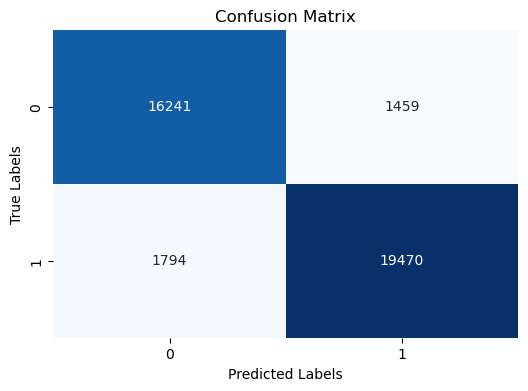

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

So we can see that the dataset can be used by machine learning, however KNN isn't going to be able to tell us which of the features are the most important. For that, we'll need to use another method.

We'll look firstly at Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# Set up X and y variables
y, X = df_ratings['satisfaction'], df_ratings.drop(columns='satisfaction')

# fit a model
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_ratings.satisfaction, random_state=1)
logreg = LogisticRegression(C=100, max_iter=1000).fit(X_train, y_train)
print('Training set score: {:3f}'.format(logreg.score(X_train,y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test,y_test)))

Training set score: 0.806663
Test set score: 0.806


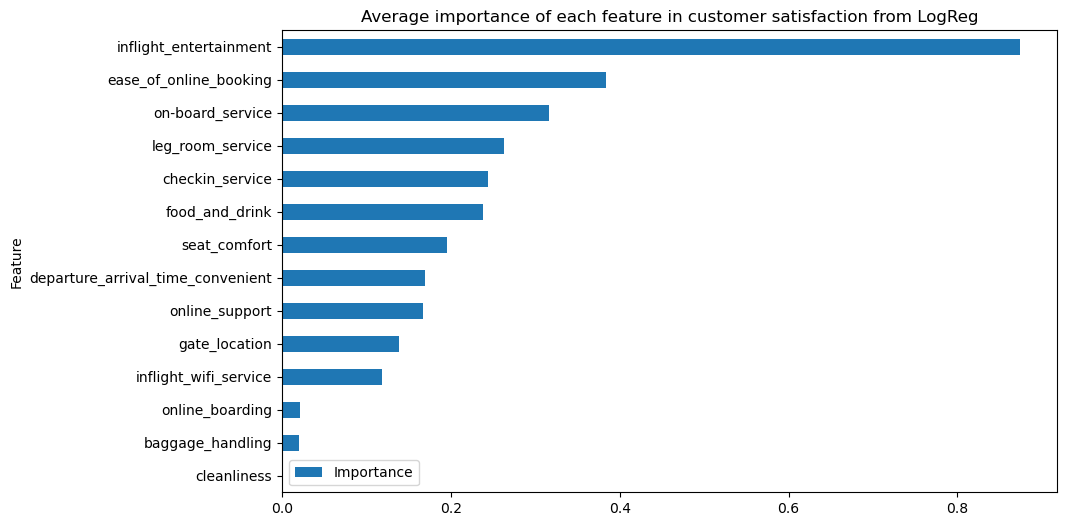

In [51]:
coefficients = logreg.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Average importance of each feature in customer satisfaction from LogReg')
plt.show()

The results above are quite interesting - the model has predicted that inflight_entertainment is by far the most important feature when it comes to customer satisfaction, while cleanliness hardly ranks at all.

I've plotted the ratings for both inflight_entertainment and cleanlineness again below to look at this more closely.

Recall that 1 = satisfied and 0 = dissatisfied

For inflight_entertainment, there is a very distinct difference between the satisfied (1) group and the dissatisfied (0) group's ratings. This distinction is weaker for cleanliness. It's likely these differences have impacts the feature importance. According to this model, when a customer likes the inflight_entertainment, they <i>really</i> like it!

But the model isn't that accurate - a score of 0.80 is not ideal. We can probably do better.

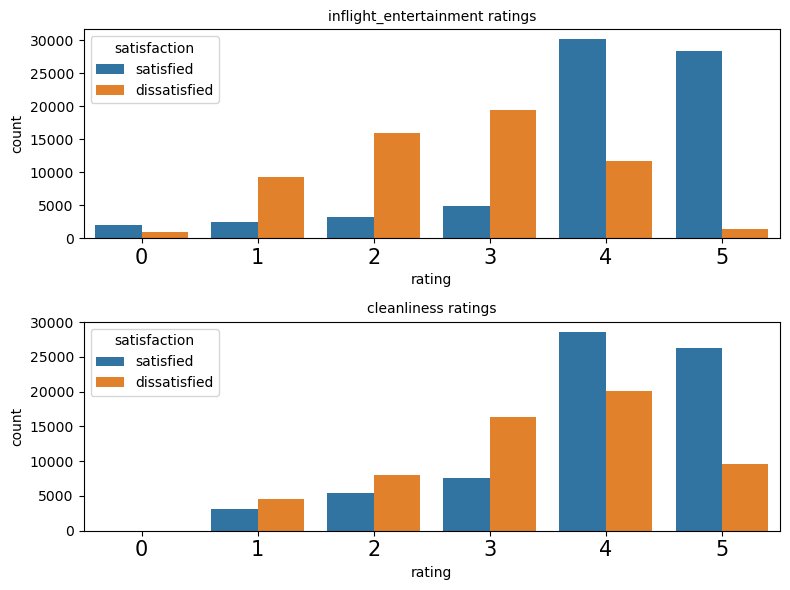

In [52]:
fig = plt.figure(2,figsize=(8,6))

plot_cols = ['inflight_entertainment', 'cleanliness']

for i, col in enumerate(plot_cols,1):
    fig.add_subplot(2,1,i)
    sns.countplot(data=df, x=df[col], hue='satisfaction')
    plt.title(col + ' ratings', size=10)
    plt.xlabel('rating')
    plt.xticks(size=15)
plt.tight_layout()
plt.savefig('satisfaction_and_ratings.jpg')
plt.show(1)

In [53]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Set up X and y variables
y, X = df_ratings['satisfaction'], df_ratings.drop(columns='satisfaction')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_ratings.satisfaction, random_state=1)

forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [54]:
print('Accuracy on training set: {:.3f}'.format(forest.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test,y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.948


This is a much better score than the logistic regression model earlier.

In [55]:
rating_list = list(df_ratings.drop(columns='satisfaction').columns)

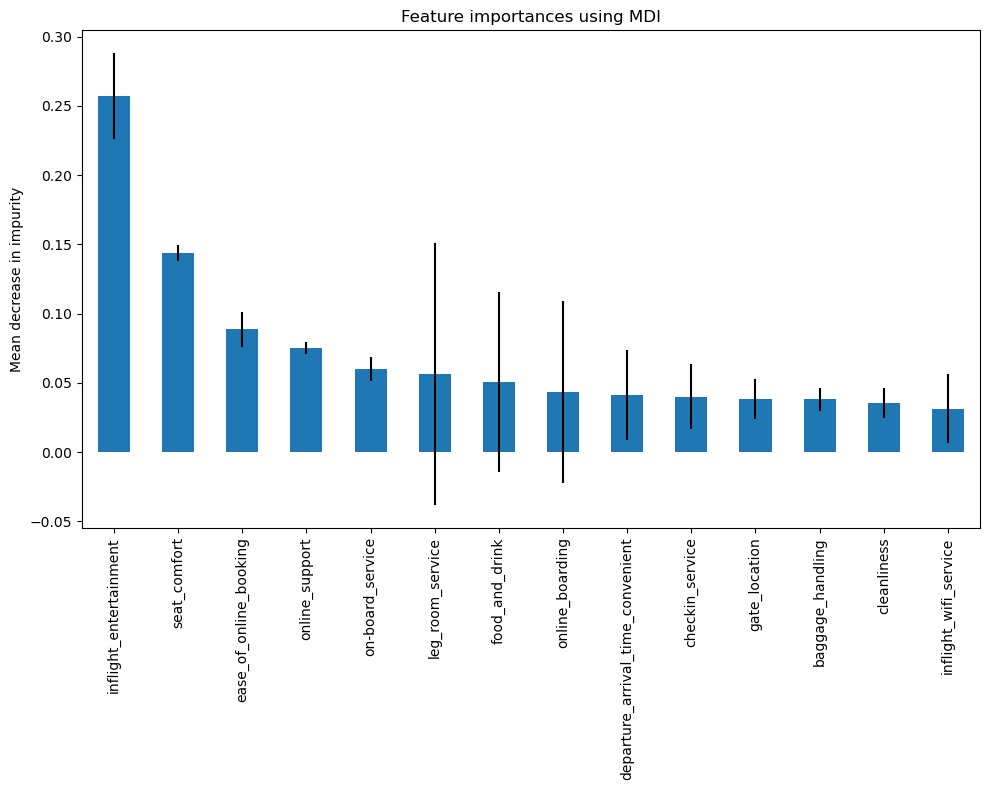

In [56]:
#code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = forest.feature_importances_

forest_importances = pd.Series(importances, index=rating_list).sort_values(ascending=False)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots(1,1, figsize=(10,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The Random Forest algorithm has also selected inflight_entertainment as it's most important feature to distinguish a satisfied from a dissatisfied customer. Seat comfrot also features quite highly, alongside some online services, while the remainder of features are of diminishing importance.

It would be interesting to see if there is a difference in how this model looks for economy versus business class customers.

In [57]:
#splitting datasets by customer class
df_business = df_processed[df_processed['Business'] == 1]
df_eco = df_processed[(df_processed['Eco'] == 1) | df_processed['Eco Plus'] == 1]

#drop unnecessary columns
df_business.drop(columns=['gender', 'customer_type','age','type_of_travel','flight_distance',
                              'departure_delay_in_minutes','was_delayed','Business',
                              'Eco','Eco Plus'], inplace=True)

df_eco.drop(columns=['gender', 'customer_type','age','type_of_travel','flight_distance',
                              'departure_delay_in_minutes','was_delayed','Business',
                              'Eco','Eco Plus'], inplace=True)

/var/folders/jb/5csh6qnx4y7brg28_7d39qyw0000gq/T/ipykernel_34620/2582409253.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business.drop(columns=['gender', 'customer_type','age','type_of_travel','flight_distance',
/var/folders/jb/5csh6qnx4y7brg28_7d39qyw0000gq/T/ipykernel_34620/2582409253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eco.drop(columns=['gender', 'customer_type','age','type_of_travel','flight_distance',


In [58]:
#setting up the Random Forest Model for Business class first
# Set up X and y variables
y, X = df_business['satisfaction'], df_business.drop(columns=['satisfaction'])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_business.satisfaction, random_state=1)

forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train,y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test,y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.966


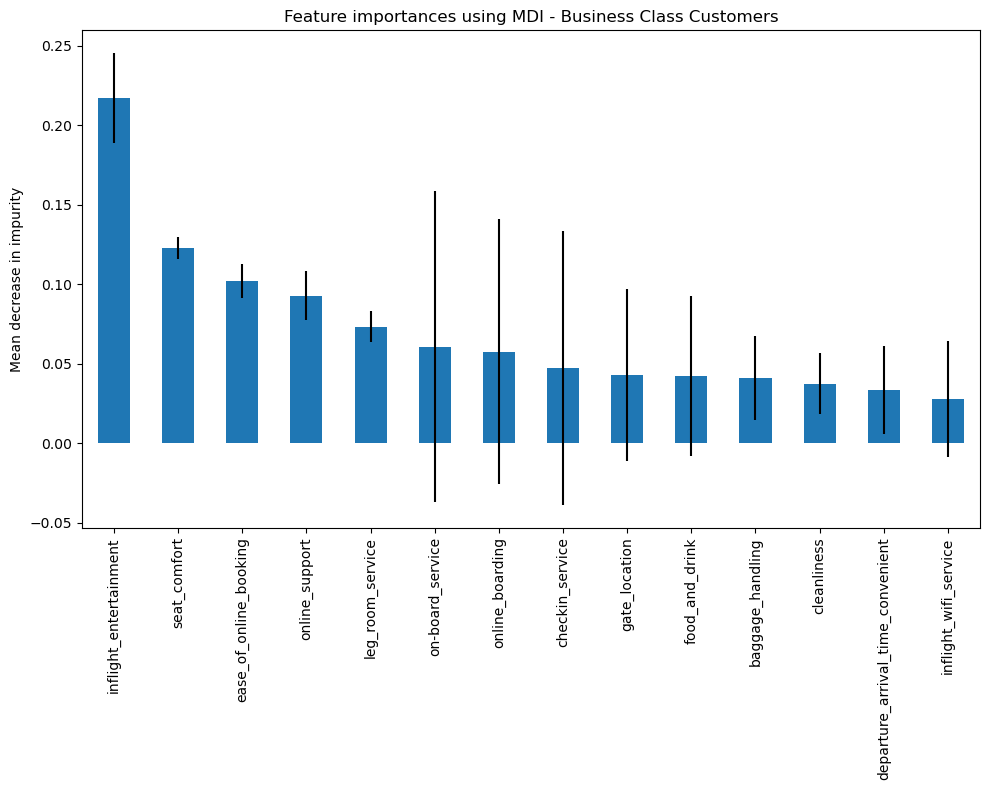

In [59]:
#code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
rating_list_class = list(df_business.drop(columns=['satisfaction']).columns)
importances = forest.feature_importances_

forest_importances = pd.Series(importances, index=rating_list_class).sort_values(ascending=False)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots(1,1, figsize=(10,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI - Business Class Customers")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [60]:
#setting up the Random Forest Model for Economy Classes
# Set up X and y variables
y, X = df_eco['satisfaction'], df_eco.drop(columns=['satisfaction'])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_eco.satisfaction, random_state=1)

forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train,y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test,y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.933


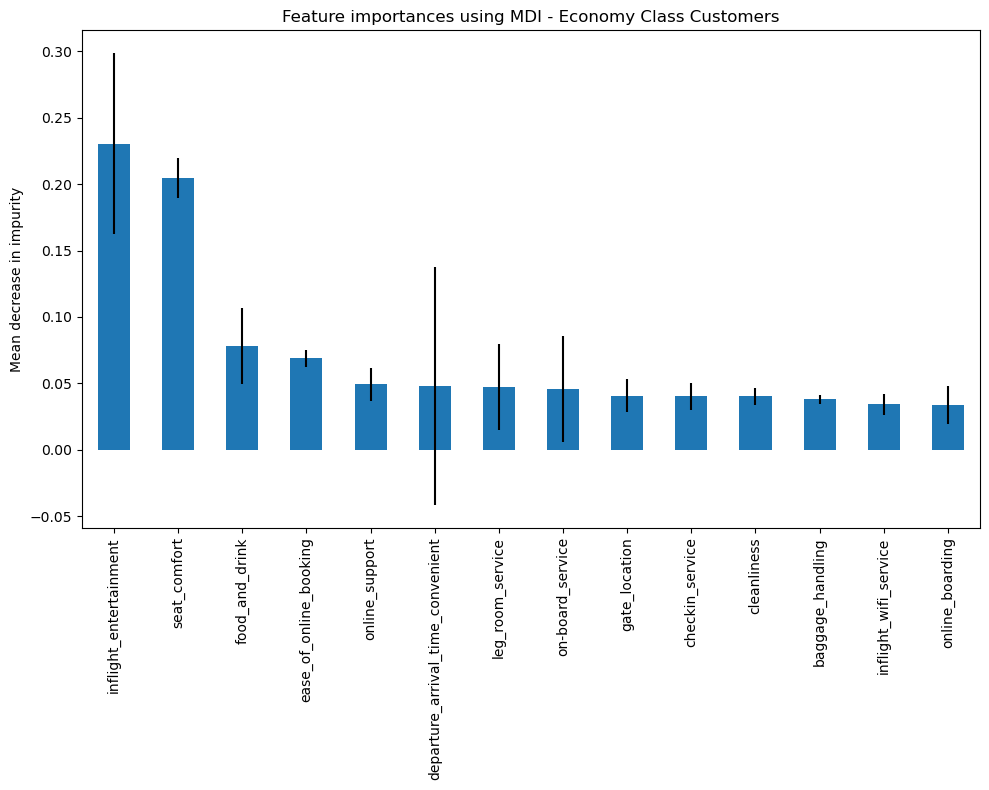

In [61]:
#code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = forest.feature_importances_

forest_importances = pd.Series(importances, index=rating_list_class).sort_values(ascending=False)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots(1,1, figsize=(10,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI - Economy Class Customers")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()